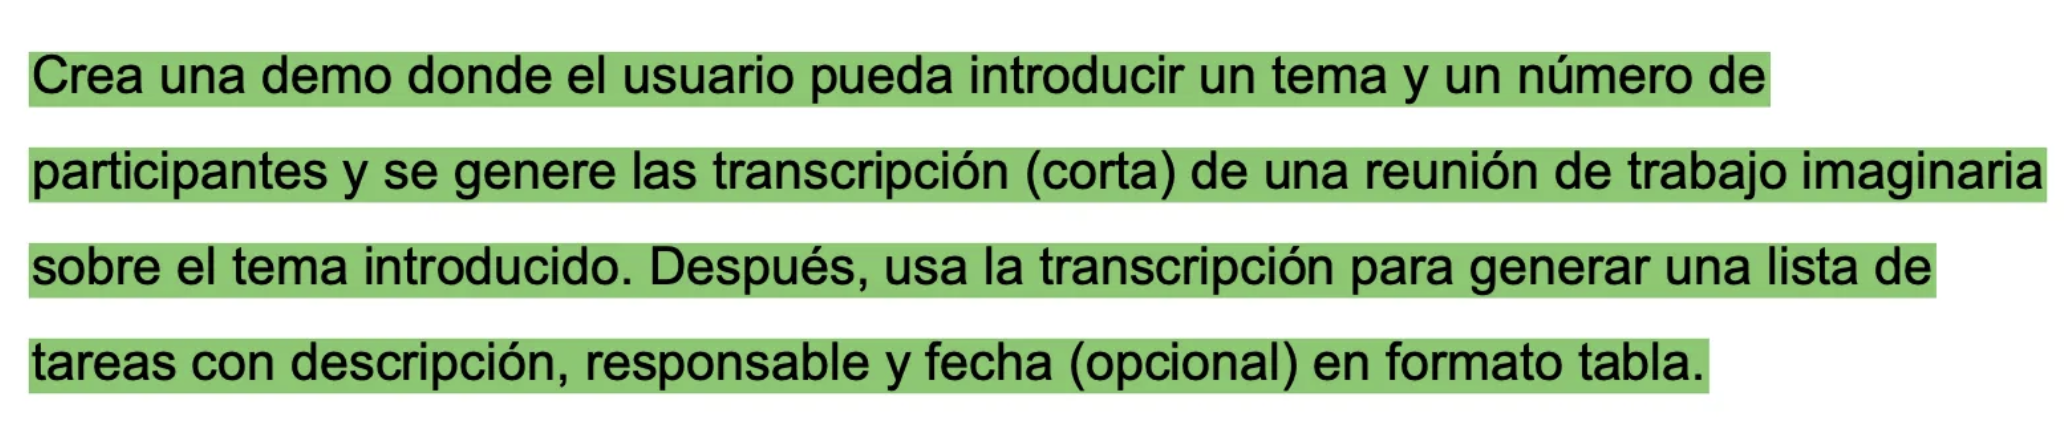

### Instalación de dependencias

In [1]:
# Instalamos las dependencias necesarias
!pip install gradio google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 2.1 MB/s eta 0:00:00


### Crear Demo

In [2]:
from google.colab import userdata
from google import genai
from google.genai import types

client = genai.Client(
    api_key=userdata.get("GOOGLE_API_KEY"),
)

def generate_text(user_prompt):
  response = client.models.generate_content(
      model="gemini-2.0-flash",
      contents=types.Content(
          role="user",
          parts=[
              types.Part.from_text(text=user_prompt),
          ],
      ),
  )
  return response.text

In [9]:
import gradio as gr
import random

# Function to generate a meeting transcript
def generate_meeting_transcript(theme, count):
    # Introductory lines
    intro = f"Bienvenidos a nuestra reunión sobre {theme}. Hoy tenemos {count} participantes."
    agenda = f"Hoy discutiremos los puntos clave relacionados con {theme}."

    # Generate a short transcript with autogenerated dialogue
    transcript = [intro, agenda]

    participants = [f"Participante {i+1}" for i in range(count)]
    dialogue_length = random.randint(5, 10) # Random length of dialogue

    for _ in range(dialogue_length):
        speaker = random.choice(participants)
        if random.random() < 0.2: # 20% chance of a question
            line = f"{speaker}: ¿Podríamos profundizar en el punto {random.choice(['1', '2', '3'])}?"
        elif random.random() < 0.1: # 10% chance of an agreement
            line = f"{speaker}: Estoy de acuerdo con {random.choice(['lo dicho anteriormente', 'la propuesta'])}."
        else:
            line = f"{speaker}: Creo que deberíamos considerar {random.choice(['una nueva estrategia', 'un enfoque diferente', 'los datos recientes'])}."
        transcript.append(line)

    # Concluding lines
    conclusion = f"Gracias a todos por su participación. Continuaremos discutiendo {theme} en nuestra próxima reunión."
    transcript.append(conclusion)

    return "\n".join(transcript)

# examples
examples = [
    ["Fashion"],
    ["E-waste"],
    ["HR"],
]

# Gradio interface
demo = gr.Interface(
    title="Generador de Transcripciones de Reuniones",
    description="Introduce un tema y un número de participantes para generar una transcripción corta de una reunión de trabajo imaginaria.",
    fn=generate_meeting_transcript,  # Function to wrap a user interface (UI) around
    inputs=[
        gr.Textbox(label="Tema de la Reunión", placeholder="Introduce el tema de la reunión..."),  # Text input for theme
        gr.Slider(1, 100, value=4, label="Número de Participantes", info="Elige el número de participantes para tu reunión (Máx 100 personas)", step=1)  # Slider for attendees
    ],
    outputs="text",
    examples = examples
)

demo.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://13b21e54becd756b37.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


### Lista de tareas

In [8]:
import gradio as gr
from datetime import datetime, timedelta

# Function to generate a meeting transcript and extract action items
def generate_meeting_transcript(theme, count):
    # Get the current date
    current_date = datetime.now().date()

    # Introductory lines with the current date
    intro = f"Bienvenidos a nuestra reunión sobre {theme} el {current_date}. Hoy tenemos {count} participantes."
    agenda = f"Hoy discutiremos los puntos clave relacionados con {theme}.\n"

    # Generate discussion points
    discussion_points = [
        f"¿Cuáles son los desafíos actuales en {theme}?",
        f"¿Qué estrategias podemos implementar para mejorar en {theme}?",
        f"¿Cómo afecta {theme} a nuestro rendimiento general?",
        f"¿Qué oportunidades podemos aprovechar en {theme}?",
        f"¿Qué recursos necesitamos para avanzar en {theme}?"
    ]

    # Generate decisions made
    decisions = [
        f"Se decidió que se realizará un análisis más profundo sobre {theme}.",
        f"Se acordó establecer un equipo para abordar los problemas relacionados con {theme}.",
        f"Se propuso un plan de acción para implementar mejoras en {theme}.",
        f"Se decidió realizar una reunión de seguimiento en dos semanas para evaluar el progreso en {theme}.\n"
    ]

    # Generate action items
    action_items = [
        f"- Participante 1 se encargará de investigar más sobre {theme}.",
        f"- Participante 2 presentará un informe sobre {theme} en la próxima reunión.",
        f"- Participante 3 coordinará con otros departamentos sobre {theme}.",
        f"- Participante 4 recopilará datos relevantes sobre {theme}."
    ]

    # Create the transcript
    transcript = [intro, agenda]

    # Add discussion points
    for point in discussion_points:
        transcript.append(f"Participante: {point} \n")

    # Add decisions made
    for decision in decisions:
        transcript.append(f"Decisión: {decision} \n")

    # Add action items
    for i in range(min(count, len(action_items))):
        transcript.append(action_items[i])

    # Extract action items for the table
    tasks = []
    for i in range(min(count, len(action_items))):
        task_description = action_items[i]
        responsible = f"Participante {i + 1}"
        # Set a unique due date for each task
        due_date = (datetime.now() + timedelta(days=i + 1)).date()
        tasks.append((task_description, responsible, due_date))

    return "\n".join(transcript), tasks

# Gradio interface
def generate_and_display(theme, count):
    transcript, tasks = generate_meeting_transcript(theme, count)
    return transcript, tasks

# Examples
examples = [
    ["Fashion", 4],
    ["E-waste", 3],
    ["HR", 2],
]

# Gradio interface
with gr.Blocks() as demo:
    gr.Markdown("# Generador de Transcripciones de Reuniones")
    gr.Markdown("Introduce un tema y un número de participantes para generar una transcripción corta de una reunión de trabajo imaginaria y una lista de tareas.")

    theme_input = gr.Textbox(label="Tema de la Reunión", placeholder="Introduce el tema de la reunión...")
    participant_input = gr.Slider(1, 100, value=4, label="Número de Participantes", info="Elige el número de participantes para tu reunión (Máx 100 personas)", step=1)

    submit_button = gr.Button("Generar Transcripción", elem_id="submit-button", variant="primary")
    clear_button = gr.Button("Limpiar", elem_id="clear-button", variant="secondary")

    transcript_output = gr.Textbox(label="Transcripción de la Reunión", lines=10)
    tasks_output = gr.Dataframe(label="Lista de Tareas", headers=["Descripción", "Responsable", "Fecha"], type="array")

    # Define button actions
    submit_button.click(generate_and_display, inputs=[theme_input, participant_input], outputs=[transcript_output, tasks_output])
    clear_button.click(lambda: ("", []), outputs=[transcript_output, tasks_output])  # Clear outputs

demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f754c9c1977e26c434.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
